In [33]:
import string
import re
from numpy import array,argmax,random,take
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding,RepeatVector
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth',200)
import numpy as np

In [11]:
file_path = '/Users/hardikyadav/Desktop/campusX/eng_german.txt'

# Open the file in read mode and read its contents
with open(file_path, 'r') as file:
    text = file.read()

In [12]:
text

'Come in.\tGaan binne.\tCC-BY 2.0 (France) Attribution: tatoeba.org #348091 (Hertz) & #2783902 (Diablofire)\nShe runs.\tSy hardloop.\tCC-BY 2.0 (France) Attribution: tatoeba.org #672264 (CM) & #672267 (winterstream)\nYou lost.\tJy verloor.\tCC-BY 2.0 (France) Attribution: tatoeba.org #6440636 (CK) & #6456479 (Dewald)\nGo inside.\tGaan binne.\tCC-BY 2.0 (France) Attribution: tatoeba.org #2428954 (CK) & #2783902 (Diablofire)\nLook back.\tKyk agter jou.\tCC-BY 2.0 (France) Attribution: tatoeba.org #2111609 (CK) & #5507226 (CJuser01)\nHe is poor.\tHy is arm.\tCC-BY 2.0 (France) Attribution: tatoeba.org #516601 (kebukebu) & #6007351 (CJuser01)\nI eat rice.\tEk eet rys.\tCC-BY 2.0 (France) Attribution: tatoeba.org #7073209 (azraelgnosis) & #5930641 (CJuser01)\nTom is wet.\tTom is nat.\tCC-BY 2.0 (France) Attribution: tatoeba.org #2236921 (CK) & #5532438 (CJuser01)\nWe all lie.\tOns almal lieg.\tCC-BY 2.0 (France) Attribution: tatoeba.org #6440635 (CK) & #6456480 (Dewald)\nI\'m thirsty.\tEk i

In [13]:
def to_line(text):
    sents = text.strip().split('\n')
    sents = [i.split('\t') for i in sents]
    return sents

In [14]:
deu_eng = to_line(text)
deu_eng = array(deu_eng)

In [15]:
deu_eng = deu_eng[:50000,:]

In [17]:
#removing punctuation
deu_eng[:,0] = [s.translate(str.maketrans('','',string.punctuation)) for s in deu_eng[:,0]]
deu_eng[:,1] = [s.translate(str.maketrans('','',string.punctuation)) for s in deu_eng[:,1]]

deu_eng


array([['Come in', 'Gaan binne',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #348091 (Hertz) & #2783902 (Diablofire)'],
       ['She runs', 'Sy hardloop',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #672264 (CM) & #672267 (winterstream)'],
       ['You lost', 'Jy verloor',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #6440636 (CK) & #6456479 (Dewald)'],
       ...,
       ['In the past the boys were taught to fend for themselves while still very young',
        'In die verlede was die seuns geleer om vir hulself te verdedig terwyl hulle nog baie jonk was',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #272154 (CK) & #2783274 (Diablofire)'],
       ['These three hours of driving have worn me out Lets stop at the first rest area we see',
        'Hierdie drie ure van bestuur het my uitgeput Kom ons stop by die eerste rusplek wat ons sien',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #3327934 (_undertoad) & #3328056 (Diablofire)'],
       ['I had 

In [18]:
for i in range(len(deu_eng)):
    deu_eng[i,0] = deu_eng[i,0].lower()
    deu_eng[i,1] = deu_eng[i,1].lower()

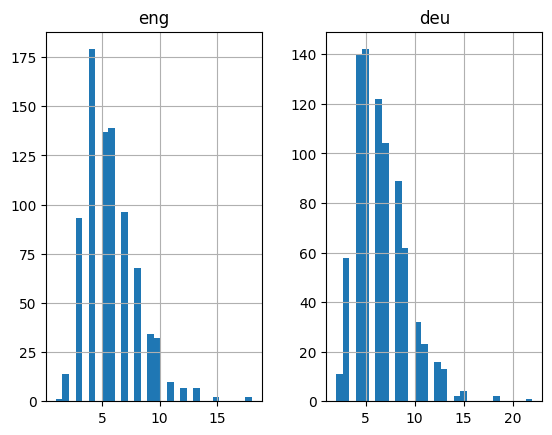

In [19]:
eng_1 = []
deu_1 = []

for i in deu_eng[:,0]:
    eng_1.append(len(i.split()))

for i in deu_eng[:,1]:
    deu_1.append(len(i.split()))

length_df = pd.DataFrame({'eng':eng_1,'deu':deu_1})

length_df.hist(bins = 30)
plt.show()

In [20]:
def tokenization(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [21]:
eng_tokenizer = tokenization(deu_eng[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1

eng_length = 8
print('English Vocabulary Size: %d' % eng_vocab_size)

English Vocabulary Size: 1050


In [22]:
deu_tokenizer = tokenization(deu_eng[:, 1])
deu_vocab_size = len(deu_tokenizer.word_index) + 1

deu_length = 8
print('Deutch Vocabulary Size: %d' % deu_vocab_size)

Deutch Vocabulary Size: 1021


In [23]:
def encode_sequences(tokenizer,length,lines):
    seq = tokenizer.texts_to_sequences(lines)
    seq = pad_sequences(seq,maxlen=length,padding = 'post')
    return seq

In [ ]:
#LSTM Layer (Encoder)
#Dense Layers (Decoder)



In [24]:
from sklearn.model_selection import train_test_split

# split data into train and test set
train, test = train_test_split(deu_eng, test_size=0.2, random_state = 12)


In [25]:
x_train = encode_sequences(deu_tokenizer,deu_length,train[:,1])
y_train = encode_sequences(eng_tokenizer,eng_length,train[:,0])

x_test = encode_sequences(deu_tokenizer,deu_length,test[:,1])
y_test = encode_sequences(eng_tokenizer,eng_length,test[:,0])

In [26]:
##### ******* __________



def define_model(in_vocab,out_vocab, in_timesteps,out_timesteps,units):
    model = Sequential()
    model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
    model.add(LSTM(units))
    model.add(RepeatVector(out_timesteps))
    model.add(LSTM(units, return_sequences=True))
    model.add(Dense(out_vocab, activation='softmax'))
    return model

In [27]:
model = define_model(deu_vocab_size, eng_vocab_size, deu_length, eng_length, 512)


In [28]:
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

In [30]:
history = model.fit(x_train, y_train.reshape(y_train.shape[0], y_train.shape[1], 1),
                    epochs=15, batch_size=512, validation_split = 0.2, 
                    verbose=1)

Epoch 1/15
2/2 [==============================] - 1s 136ms/step - loss: 4.6759 - val_loss: 4.6682
Epoch 2/15
2/2 [==============================] - 1s 118ms/step - loss: 4.5459 - val_loss: 4.7506
Epoch 3/15
2/2 [==============================] - 1s 117ms/step - loss: 4.5813 - val_loss: 4.5797
Epoch 4/15
2/2 [==============================] - 1s 155ms/step - loss: 4.3926 - val_loss: 4.6541
Epoch 5/15
2/2 [==============================] - 1s 134ms/step - loss: 4.4485 - val_loss: 4.6143
Epoch 6/15
2/2 [==============================] - 1s 131ms/step - loss: 4.3763 - val_loss: 4.5233
Epoch 7/15
2/2 [==============================] - 1s 142ms/step - loss: 4.2678 - val_loss: 4.5743
Epoch 8/15
2/2 [==============================] - 1s 132ms/step - loss: 4.3109 - val_loss: 4.4556
Epoch 9/15
2/2 [==============================] - 1s 128ms/step - loss: 4.1794 - val_loss: 4.5772
Epoch 10/15
2/2 [==============================] - 1s 158ms/step - loss: 4.2574 - val_loss: 4.5605
Epoch 11/15
2/2 [==

In [34]:
#prediction
predictions = model.predict(x_test.reshape((x_test.shape[0], x_test.shape[1])))

# Find the class with the highest probability for each sample
predicted_classes = np.argmax(predictions, axis=1)


6/6 [==============================] - 1s 21ms/step


In [35]:
def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
    return None

In [37]:
preds_text = []
for i in predicted_classes:
    temp = []
    for j in range(len(i)):
        t = get_word(i[j], eng_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], eng_tokenizer)) or (t == None):
                temp.append('')
            else:
                temp.append(t)
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t) 

    preds_text.append(' '.join(temp))

In [38]:
pred_df = pd.DataFrame({'actual' : test[:,0], 'predicted' : preds_text})